In [24]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [25]:
(X_train, Y_train), (X_test, Y_test ) = mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
Y_train.shape

(60000,)

In [28]:
Y_train[0]

5

In [29]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
x_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train / 255
X_test  / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
Y_train[0]

5

In [31]:
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
input_size = 784
batch_size = 100
hidden_neurons = 400
epochs = 5

In [34]:
model = Sequential()
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

In [35]:
model = Sequential()
model.add(Dense (classes, input_dim=input_size))
model.add(Activation('softmax'))

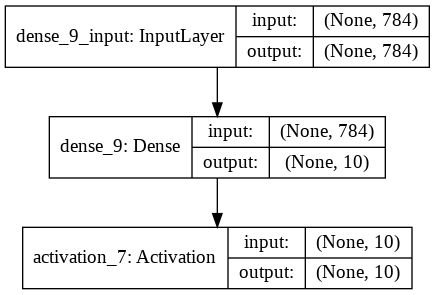

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

In [37]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='adadelta')

In [38]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 11.8949 - accuracy: 0.8076
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 5.4394 - accuracy: 0.8736
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 4.6176 - accuracy: 0.8793
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 4.0564 - accuracy: 0.8830
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 3.8404 - accuracy: 0.8832


In [39]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('＼n''Test accuracy:', score[1])
#Test accuracy: 0.983


10000/10000 [==============================] - 0s 23us/step
＼nTest accuracy: 0.8996999859809875
